## Módulo A

### Imports

In [3]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import describe
import glob 
from itertools import combinations
from scipy.spatial import distance

## 2. Preparação do dataset

### 2.1 Leitura e extração de ficheiros do dataset

In [4]:
path = "FacialTracking_Actors_01-24"
facial_list = os.listdir(path)
#print(facial_list)
f_list=facial_list.copy()
emotions= ["01","02","03","04","05","06","07","08"]
actors=["01", "02", "03", "04" , "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24"]


#Exercício 2.1

#Optamos por criar um dicionário que irá utilizar a emoção como chave primária e o ator como chave secundária


emotion_actor_files = {}

for emotion in emotions:
    emotion_actor_files[emotion] = {}
    for actor in actors:
        emotion_actor_files[emotion][actor] = [ elemento for elemento in facial_list if elemento.split('-')[2] == emotion and elemento.split('-')[6] == actor + ".csv"]

print(emotion_actor_files)

{'01': {'01': ['01-02-01-01-02-01-01.csv', '01-01-01-01-02-01-01.csv', '01-01-01-01-01-02-01.csv', '01-02-01-01-01-02-01.csv', '01-01-01-01-02-02-01.csv', '01-02-01-01-02-02-01.csv', '01-02-01-01-01-01-01.csv', '01-01-01-01-01-01-01.csv'], '02': ['01-02-01-01-02-01-02.csv', '01-01-01-01-02-01-02.csv', '01-01-01-01-01-02-02.csv', '01-02-01-01-01-02-02.csv', '01-01-01-01-02-02-02.csv', '01-02-01-01-02-02-02.csv', '01-02-01-01-01-01-02.csv', '01-01-01-01-01-01-02.csv'], '03': ['01-02-01-01-02-01-03.csv', '01-01-01-01-02-01-03.csv', '01-01-01-01-01-02-03.csv', '01-02-01-01-01-02-03.csv', '01-01-01-01-02-02-03.csv', '01-02-01-01-02-02-03.csv', '01-02-01-01-01-01-03.csv', '01-01-01-01-01-01-03.csv'], '04': ['01-01-01-01-02-01-04.csv', '01-02-01-01-02-01-04.csv', '01-02-01-01-01-02-04.csv', '01-01-01-01-01-02-04.csv', '01-02-01-01-02-02-04.csv', '01-01-01-01-02-02-04.csv', '01-01-01-01-01-01-04.csv', '01-02-01-01-01-01-04.csv'], '05': ['01-01-01-01-02-01-05.csv', '01-02-01-01-02-01-05.csv', '

### 2.2 Dados dos atores

In [5]:
def load_csv_data(file_path):
    file_path = os.path.join(path, file_path)
    if not os.path.exists(file_path):
        print(f"Arquivo não encontrado: {file_path}")
        return None
    # Carrega o arquivo CSV
    return pd.read_csv(file_path)

def get_max_frames(files_for_actor):
    max_frames = 0
    for file in files_for_actor:
        data = load_csv_data(file)
        max_frames = max(max_frames, data.shape[0])
    return max_frames

def load_data_for_individual(emotion_actor_files, actor_id):
    files_for_actor = []
    for emotion, actors_files in emotion_actor_files.items():
        files_for_actor.extend(actors_files.get(actor_id, []))
    
    #print(files_for_actor)
    max_frames = get_max_frames(files_for_actor)
    nr_videos = len(files_for_actor)
    nr_landmarks = 68
    nr_coordinates = 2 

    data_actor_array = ((nr_videos, nr_landmarks * nr_coordinates, max_frames))
    #print(data_actor_array)

    return data_actor_array


def ex2_2():
    actors_data=[]
    for i in range(len(actors)):
        actor_data = ("Ator", actors[i], load_data_for_individual(emotion_actor_files, actors[i]))
        actors_data.append(actor_data)
    return actors_data

print(ex2_2())

[('Ator', '01', (104, 136, 174)), ('Ator', '02', (104, 136, 183)), ('Ator', '03', (104, 136, 156)), ('Ator', '04', (104, 136, 177)), ('Ator', '05', (104, 136, 185)), ('Ator', '06', (104, 136, 189)), ('Ator', '07', (104, 136, 158)), ('Ator', '08', (104, 136, 166)), ('Ator', '09', (104, 136, 180)), ('Ator', '10', (104, 136, 162)), ('Ator', '11', (104, 136, 157)), ('Ator', '12', (104, 136, 145)), ('Ator', '13', (104, 136, 158)), ('Ator', '14', (104, 136, 161)), ('Ator', '15', (104, 136, 138)), ('Ator', '16', (104, 136, 158)), ('Ator', '17', (104, 136, 161)), ('Ator', '18', (60, 136, 143)), ('Ator', '19', (104, 136, 163)), ('Ator', '20', (104, 136, 169)), ('Ator', '21', (104, 136, 150)), ('Ator', '22', (104, 136, 191)), ('Ator', '23', (104, 136, 175)), ('Ator', '24', (104, 136, 173))]


### 2.3 Emoção por vídeo

In [6]:
def ex2_3():
    emotions_array = []
    count = 0
    for file_name in facial_list:
        count += 1
        # Extraindo o código da emoção do nome do arquivo
        emotion_code = file_name.split('-')[2]
        emotions_array.append([count,emotion_code])
    return np.array(emotions_array).reshape(-1,2)

print(ex2_3())

[['1' '03']
 ['2' '05']
 ['3' '06']
 ...
 ['2450' '03']
 ['2451' '05']
 ['2452' '06']]


## 2.4 Visualização de expressão em um frame

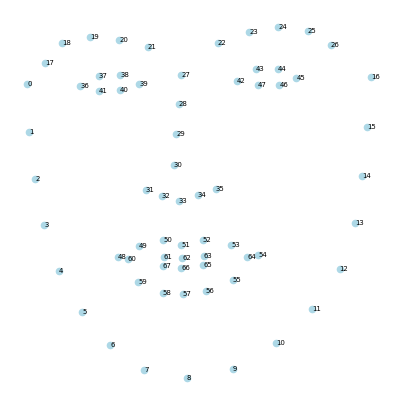

In [7]:
def ex2_4(file, frame_number):
    data = pd.read_csv(file)
    frame_data = data.iloc[frame_number - 1]
    face_x_coordinates = [frame_data[f'x_{i}'] for i in range(68)]
    face_y_coordinates = [frame_data[f'y_{i}'] for i in range(68)]
    plt.figure(figsize=(5, 5))
    plt.scatter(face_x_coordinates, face_y_coordinates, c='lightblue', s = 20)
    for i in range(68):
        plt.text(face_x_coordinates[i], face_y_coordinates[i], str(i), fontsize=5, ha='left', va='center')
    plt.axis('off')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().invert_yaxis()
    plt.show()

ex2_4("FacialTracking_Actors_01-24/01-01-01-01-01-01-01.csv", 67)

### 2.5 Visualização de expressão em um vídeo

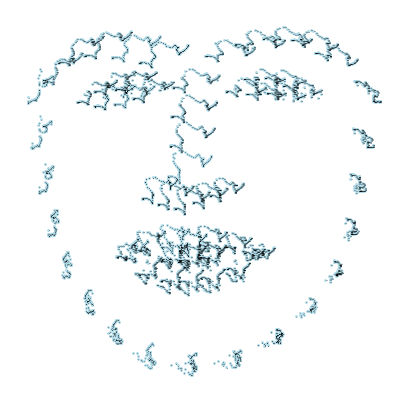

In [8]:
def ex2_5(file):
    data = pd.read_csv(file)
    
    plt.figure(figsize=(5, 5))
    total_frames = data.shape[0]

    for frame_number in range(total_frames):
        frame_data = data.iloc[frame_number]
        face_x_coordinates = [frame_data[f'x_{i}'] for i in range(68)]
        face_y_coordinates = [frame_data[f'y_{i}'] for i in range(68)]
        plt.scatter(face_x_coordinates, face_y_coordinates, c='lightblue', s=1)
        for i in range(68):
            plt.text(face_x_coordinates[i], face_y_coordinates[i], str(i), fontsize=1, ha='left', va='center')
        

    plt.axis('off') 
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().invert_yaxis() 
    plt.show()
    
ex2_5("FacialTracking_Actors_01-24/01-01-01-01-01-01-01.csv")

## Análise e tratamento de outliers

### 3.1 Normalização de coordenadas

In [9]:
def ex3_1_normal_landmarks(data_frame, xmax=1280, ymax=720):
    for i in range(68): 
        data_frame[f'x_{i}_norm'] = (data_frame[f'x_{i}'] - data_frame['x_27']) / xmax
        data_frame[f'y_{i}_norm'] = (data_frame[f'y_{i}'] - data_frame['y_27']) / ymax
    return data_frame
    
path = os.getcwd() 
folder = path + '/FacialTracking_Actors_01-24'
csv_files = glob.glob(os.path.join(folder, "*.csv")) 
for file in csv_files:
    df = pd.read_csv(file)
    update_df = ex3_1_normal_landmarks(df)
    update_df.to_csv(file)

### 3.2 Boxplot de emoções

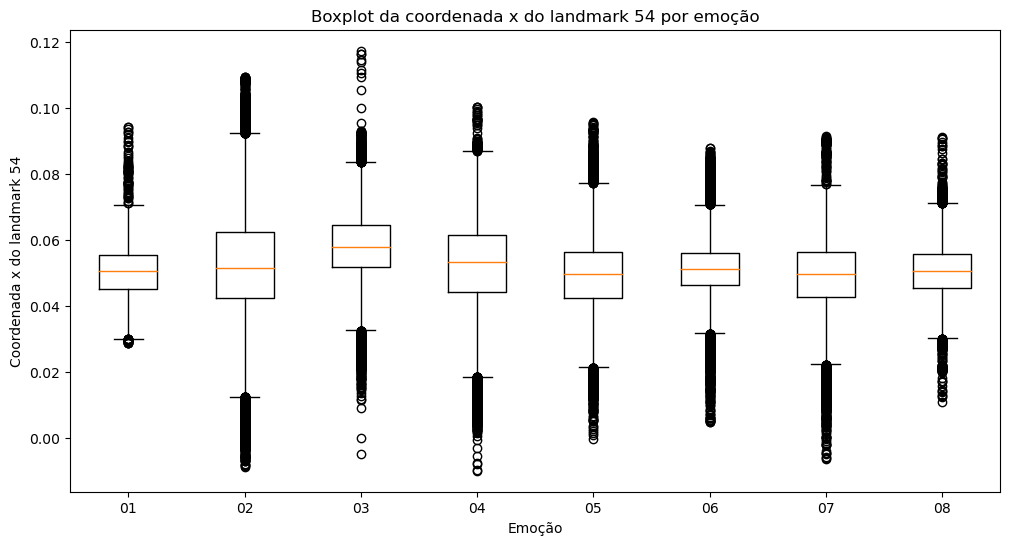

In [10]:
def ex3_2(emotion_actor_files, landmark):
    data_for_boxplot = {emotion: [] for emotion in emotion_actor_files}
    for emotion, actor_files in emotion_actor_files.items():
        for actor, file_list in actor_files.items():
            for file_name in file_list:
                file_path = os.path.join('FacialTracking_Actors_01-24', file_name)
                
                if os.path.isfile(file_path):
                    df = pd.read_csv(file_path)
                    if f'x_{landmark}_norm' in df.columns:
                        data_for_boxplot[emotion].extend(df[f'x_{landmark}_norm'].tolist())

    

    plt.figure(figsize=(12, 6))
    plt.boxplot(data_for_boxplot.values(), labels=data_for_boxplot.keys())
    plt.xlabel('Emoção')
    plt.ylabel(f'Coordenada x do landmark {landmark}')
    plt.title(f'Boxplot da coordenada x do landmark {landmark} por emoção')
    plt.show()

ex3_2(emotion_actor_files, 54)

Mesmo considerando que o dataset consiste em atores a representar uma emoção, isto é, é uma amostra que tende a ser realista (pois é representada por atores a representar uma emoção real) contudo não representa algo organico. Assim sendo, e tratando-se de 24 atores, ou seja, um mesmo conjunto de indivíduos, iremos verificar que a quantidade de outliners não é assim tão expressiva.
Isto culmina com valores de densidade que mesmo sendo diferentes (pessoas expressão emoções de forma diferente) esta diferença não é algo tão extraordinário.

### 3.3 Densidade de outliers

In [11]:
def ex3_boxplot_and_outliers(emotion_actor_files, landmarks,coord):
    data_for_boxplot = {emotion: {landmark: [] for landmark in landmarks} for emotion in emotion_actor_files}
    outliers_count = {emotion: {landmark: 0 for landmark in landmarks} for emotion in emotion_actor_files}
    total_points_count = {emotion: {landmark: 0 for landmark in landmarks} for emotion in emotion_actor_files}

    for emotion, actor_files in emotion_actor_files.items():
        for actor, file_list in actor_files.items():
            for file_name in file_list:
                file_path = os.path.join('FacialTracking_Actors_01-24', file_name)

                if os.path.isfile(file_path):
                    df = pd.read_csv(file_path)
                    for landmark in landmarks:
                        if f'{coord}_{landmark}_norm' in df.columns:
                            values = df[f'{coord}_{landmark}_norm'].tolist()
                            data_for_boxplot[emotion][landmark].extend(values)
                            total_points_count[emotion][landmark] += len(values)
                            
                            # Cálculo de outliers
                            Q1 = np.percentile(values, 25)
                            Q3 = np.percentile(values, 75)
                            IQR = Q3 - Q1
                            lower_bound = Q1 - 1.5 * IQR
                            upper_bound = Q3 + 1.5 * IQR
                        
                            outliers = [v for v in values if v < lower_bound or v > upper_bound]
                            outliers_count[emotion][landmark] += len(outliers)

    return outliers_count, total_points_count

lista = range(1, 68)
outliers_count_x, total_points_count_x = ex3_boxplot_and_outliers(emotion_actor_files,lista,'x')
outliers_count_y, total_points_count_y = ex3_boxplot_and_outliers(emotion_actor_files,lista,'y')

print('--------------------------------------Coordenada x---------------------------------')
for emotion in emotion_actor_files:
    print(f"Emoção: {emotion}")
    for landmark in lista:
        density_values = [(outliers_count_x[emotion][landmark] / total_points_count_x[emotion][landmark]) * 100 for emotion in emotion_actor_files]
        print(f"  Landmark: {landmark}")
        print(f"    Outliers: {outliers_count_x[emotion][landmark]}, Total de pontos: {total_points_count_x[emotion][landmark]}, Densidade: {(outliers_count_x[emotion][landmark]/total_points_count_x[emotion][landmark])*100}")
    print(f"Média da densidade da emoção {emotion} : {round(np.mean(density_values),2)}")
    print(f"Desvio Padrão da densidade da emoção {emotion} : {round(np.std(density_values),2)}")
    
print('--------------------------------------Coordenada y---------------------------------')
for emotion in emotion_actor_files:
    print(f"Emoção: {emotion}")
    for landmark in lista:
        density_values = [(outliers_count_y[emotion][landmark] / total_points_count_y[emotion][landmark]) * 100 for emotion in emotion_actor_files]
        print(f"  Landmark: {landmark}")
        print(f"    Outliers: {outliers_count_y[emotion][landmark]}, Total de pontos: {total_points_count_y[emotion][landmark]}, Densidade: {(outliers_count_y[emotion][landmark]/total_points_count_y[emotion][landmark])*100}")
    print(f"Média da densidade da emoção {emotion} : {round(np.mean(density_values),2)}")
    print(f"Desvio Padrão da densidade da emoção {emotion} : {round(np.std(density_values),2)}")
        
        


--------------------------------------Coordenada x---------------------------------
Emoção: 01
  Landmark: 1
    Outliers: 406, Total de pontos: 22458, Densidade: 1.8078190399857512
  Landmark: 2
    Outliers: 491, Total de pontos: 22458, Densidade: 2.186303321756167
  Landmark: 3
    Outliers: 474, Total de pontos: 22458, Densidade: 2.1106064654020837
  Landmark: 4
    Outliers: 528, Total de pontos: 22458, Densidade: 2.351055303232701
  Landmark: 5
    Outliers: 534, Total de pontos: 22458, Densidade: 2.3777718407694364
  Landmark: 6
    Outliers: 482, Total de pontos: 22458, Densidade: 2.1462285154510643
  Landmark: 7
    Outliers: 503, Total de pontos: 22458, Densidade: 2.2397363968296378
  Landmark: 8
    Outliers: 527, Total de pontos: 22458, Densidade: 2.3466025469765786
  Landmark: 9
    Outliers: 491, Total de pontos: 22458, Densidade: 2.186303321756167
  Landmark: 10
    Outliers: 457, Total de pontos: 22458, Densidade: 2.034909609048001
  Landmark: 11
    Outliers: 460, Tota

### 3.4 Z-Score

In [12]:
def ex3_4(landmark,k):
    outliers_x = []
    outliers_y = []
    outliers_x_indices = []  
    outliers_y_indices = []  
    
    for emotion, actor_files in emotion_actor_files.items():
        for actor, file_list in actor_files.items():
            for file_name in file_list:
                file_path = os.path.join('FacialTracking_Actors_01-24', file_name)
                
                if os.path.isfile(file_path):
                    df = pd.read_csv(file_path)
                    if f'x_{landmark}_norm' in df.columns:
                        sample = df[f'x_{landmark}_norm'].tolist()
                        mean = np.mean(sample)
                        std = np.std(sample)
                        for i, value in enumerate(sample):
                            z = (value - mean) / std
                            if z > k or z < -k:
                                outliers_x.append(value)
                                outliers_x_indices.append(i)
                    
                    if f'y_{landmark}_norm' in df.columns:
                        sample = df[f'y_{landmark}_norm'].tolist()
                        mean = np.mean(sample)
                        std = np.std(sample)
                        for i, value in enumerate(sample):
                            z = (value - mean) / std
                            if z > k or z < -k:
                                outliers_y.append(value)
                                outliers_y_indices.append(i)
                                
    return outliers_x, outliers_x_indices, outliers_y, outliers_y_indices
                        
    

ex3_4(57,3)     

([0.0068749999999999,
  0.008125,
  0.0059375,
  0.006328125,
  0.006484375,
  -0.0092968749999999,
  -0.011484375,
  0.01296875,
  0.000546875,
  0.000390625,
  0.0,
  0.000390625,
  0.0005468749999999,
  -0.0048437499999999,
  -0.004375,
  0.001953125,
  0.0017187499999999,
  0.0018749999999999,
  0.0018749999999999,
  -0.005234375,
  -0.000859375,
  -0.0078125,
  0.00328125,
  0.003125,
  -0.007421875,
  0.003359375,
  0.00234375,
  -0.0028125,
  -0.0029687499999999,
  -0.0028906249999999,
  -0.0028906249999999,
  -0.001015625,
  0.005859375,
  -0.00421875,
  -0.0035937499999999,
  0.00015625,
  0.001953125,
  0.0007031249999999,
  0.00078125,
  0.003671875,
  -0.015234375,
  -0.0150781249999999,
  -0.014609375,
  0.0009375,
  0.0028906249999999,
  0.001953125,
  -0.0005468749999999,
  -0.00046875,
  -0.0124218749999999,
  -0.0142187499999999,
  -0.0122656249999999,
  0.009375,
  0.009765625,
  0.009453125,
  -0.002578125,
  -0.0033593749999999,
  -0.00234375,
  -0.0010937499999999,

### 3.5 Aplicação do Z-Score

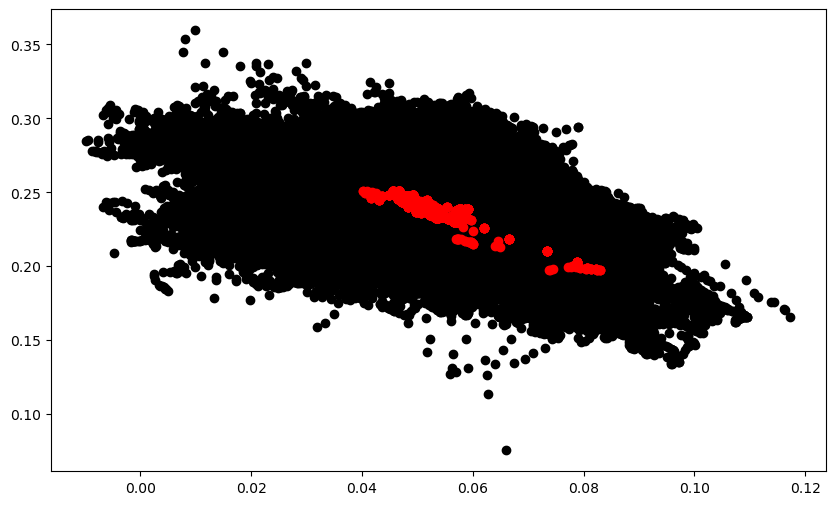

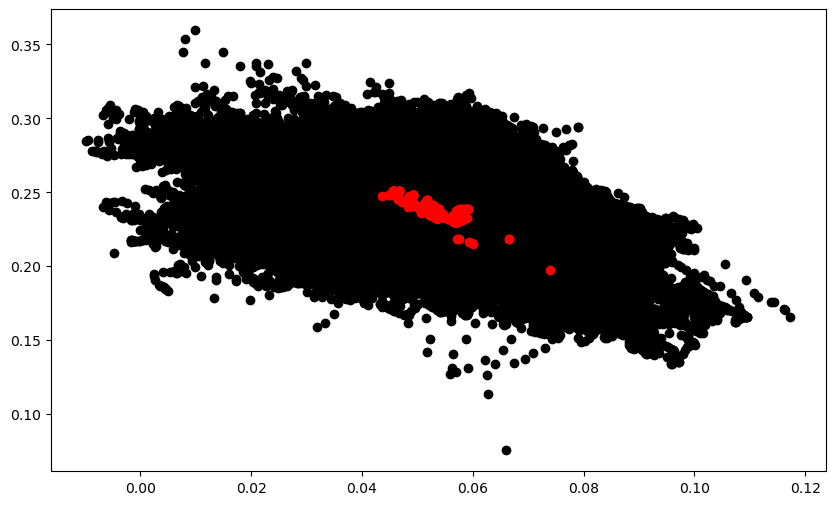

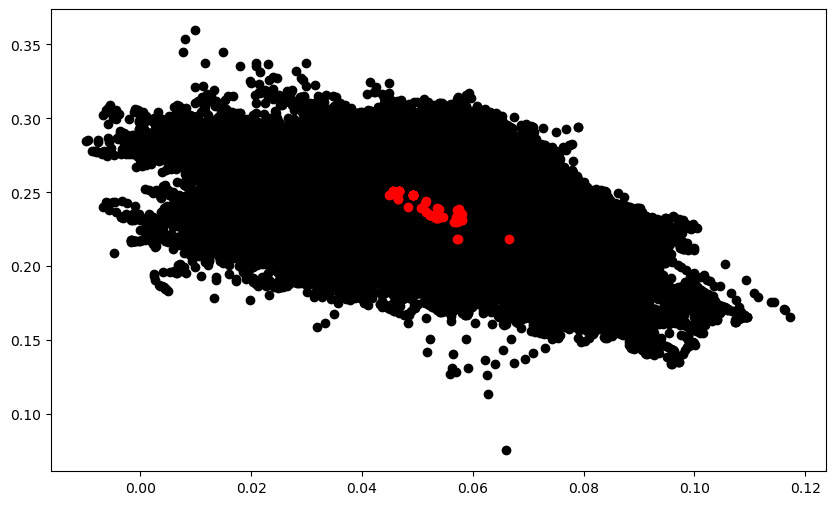

In [13]:
def get_samples(landmark):
    all_sample_x = []
    all_sample_y = []
    for emotion, actor_files in emotion_actor_files.items():
        for actor, file_list in actor_files.items():
            for file_name in file_list:
                file_path = os.path.join('FacialTracking_Actors_01-24', file_name)
                
                if os.path.isfile(file_path):
                    df = pd.read_csv(file_path)
                    if f'x_{landmark}_norm' in df.columns:
                        sample = df[f'x_{landmark}_norm'].tolist()
                        for i in sample:
                            all_sample_x.append(i)
                    if f'y_{landmark}_norm' in df.columns:
                        sample = df[f'y_{landmark}_norm'].tolist()
                        for i in sample:
                            all_sample_y.append(i)
    return all_sample_x, all_sample_y

                        

def ex3_5_plot_outliers(landmark):
    
    outliers_x_k3,outliers_x_k3_indice, outliers_y_k3, outliers_y_k3_indice = ex3_4(landmark,3)
    outliers_x_k35,outliers_x_k35_indice, outliers_y_k35, outliers_y_k35_indice = ex3_4(landmark,3.5)
    outliers_x_k4,outliers_x_k4_indice, outliers_y_k4, outliers_y_k4_indice = ex3_4(landmark,4)
    sample_x,sample_y= get_samples(landmark)
    plt.figure(figsize=(10,6))
    plt.scatter(sample_x,sample_y, color = 'black')
    for index1 in outliers_x_k3_indice:
        plt.scatter(sample_x[index1],sample_y[index1],color = 'red')
    for index2 in outliers_y_k3_indice:
        plt.scatter(sample_x[index2],sample_y[index2], color = 'red')
    plt.show()

    plt.figure(figsize=(10,6))
    plt.scatter(sample_x,sample_y, color = 'black')
    for index1 in outliers_x_k35_indice:
        plt.scatter(sample_x[index1],sample_y[index1],color = 'red')
    for index2 in outliers_y_k35_indice:
        plt.scatter(sample_x[index2],sample_y[index2], color = 'red')
    plt.show()

    plt.figure(figsize=(10,6))
    plt.scatter(sample_x,sample_y, color = 'black')
    for index1 in outliers_x_k4_indice:
        plt.scatter(sample_x[index1],sample_y[index1],color = 'red')
    for index2 in outliers_y_k4_indice:
        plt.scatter(sample_x[index2],sample_y[index2], color = 'red')
    plt.show()
    
ex3_5_plot_outliers(54)

Exercício 3.6

Ao comparar os outputs do Exercício 3.2 e o do Exercício 3.5 podemos observar que diferentes m+etodos de identificação de outliers podem induzir a uma identificação diferente de outliners.
Com o método Boxplot existem imensos pontos que são considerados outliners porque com este método um outlier é qualquer ponto fora de uma área delimitada. Tendo em conta o dataset esta abordagem não é correta pela grande variabilidade dos dados.
Com o método Z-Score podemos ajustar a sensibilidade de deteção de outliers ajustando o valor K. Esta abordagem pode ser mais interessante tendo em conta a forma do dataset. 

### 3.7 K-Means

/Users/lpseco11/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


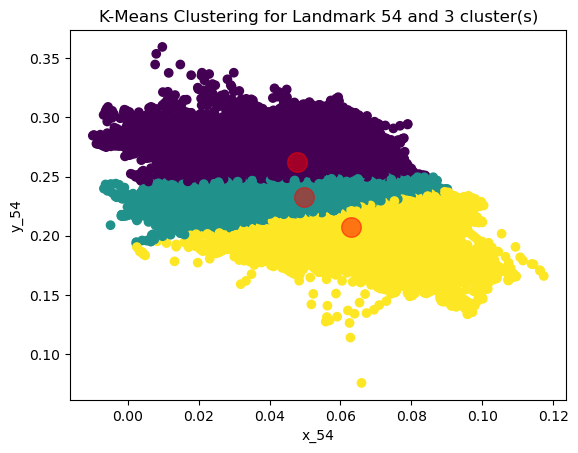

/Users/lpseco11/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


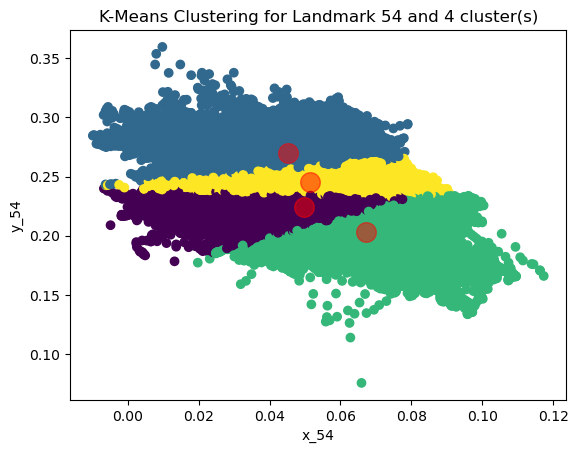

In [14]:
def ex3_7_kmeans(landmark, n_clusters):
    all_sample_x, all_sample_y = get_samples(landmark)
    data = np.column_stack((all_sample_x, all_sample_y))
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data)
    labels = kmeans.labels_

    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
    plt.title(f'K-Means Clustering for Landmark {landmark} and {n_clusters} cluster(s)')
    plt.xlabel(f'x_{landmark}')
    plt.ylabel(f'y_{landmark}')
    plt.show()

ex3_7_kmeans(54, 3)
ex3_7_kmeans(54, 4)


In [15]:
directory = 'FacialTracking_Actors_01-24'  
landmark_number = 54 

def load_data_from_csv(directory, landmark):
    all_sample_x = []
    all_sample_y = []
    
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            
            # Verifica se as colunas existem
            x_col_name = f'x_{landmark}_norm'
            y_col_name = f'y_{landmark}_norm'
            
            if x_col_name in df.columns and y_col_name in df.columns:
                all_sample_x.extend(df[x_col_name].tolist())
                all_sample_y.extend(df[y_col_name].tolist())
    
    return np.array(all_sample_x), np.array(all_sample_y)

def inject_outliers_2d(data_x, data_y, k, target_density):
    mean_x, std_x = np.mean(data_x), np.std(data_x)
    mean_y, std_y = np.mean(data_y), np.std(data_y)
    n_total_points = len(data_x)
    n_outliers = np.sum(np.abs((data_x - mean_x) / std_x) > k) + np.sum(np.abs((data_y - mean_y) / std_y) > k)
    current_density = (n_outliers / n_total_points) * 100
    n_outliers_to_add = int((target_density * n_total_points / 100) - n_outliers)
    s_x = np.random.choice([-1, 1], n_outliers_to_add)
    s_y = np.random.choice([-1, 1], n_outliers_to_add)
    new_outliers_x = mean_x + s_x * k * std_x + np.random.uniform(-std_x, std_x, n_outliers_to_add)
    new_outliers_y = mean_y + s_y * k * std_y + np.random.uniform(-std_y, std_y, n_outliers_to_add)
    data_x = np.concatenate((data_x, new_outliers_x))
    data_y = np.concatenate((data_y, new_outliers_y))

    return data_x, data_y

def calculate_outlier_density(data_x, data_y, k):
    z_scores_x = np.abs((data_x - np.mean(data_x)) / np.std(data_x))
    z_scores_y = np.abs((data_y - np.mean(data_y)) / np.std(data_y))
    outliers = np.where((z_scores_x > k) | (z_scores_y > k), 1, 0)
    density = np.mean(outliers) * 100  # Porcentagem de outliers
    return density

def validate_outlier_injection(data_x, data_y, target_density, k):
    current_density = calculate_outlier_density(data_x, data_y, k)
    print(f"Densidade alvo de outliers: {target_density}%")
    print(f"Densidade atual de outliers: {current_density}%")

data_x, data_y = load_data_from_csv(directory, landmark_number)
data_x_outliers, data_y_outliers = inject_outliers_2d(data_x, data_y, k=3, target_density=5)
validate_outlier_injection(data_x_outliers, data_y_outliers, 5, 3)

Densidade alvo de outliers: 5%
Densidade atual de outliers: 2.3986747225281024%


## 4. Extração de informação característica

### 4.1 Extração de features

In [17]:
def calculate_mean_position(df, landmarks):
    mean_positions = {}
    for landmark in landmarks:
        mean_positions[f'x_{landmark}_mean'] = df[f'x_{landmark}_norm'].mean()
        mean_positions[f'y_{landmark}_mean'] = df[f'y_{landmark}_norm'].mean()
    return mean_positions

def calculate_std_position(df, landmarks):
    std_positions = {}
    for landmark in landmarks:
        std_positions[f'x_{landmark}_std'] = df[f'x_{landmark}_norm'].std()
        std_positions[f'y_{landmark}_std'] = df[f'y_{landmark}_norm'].std()
    return std_positions

def calculate_distances(df, landmarks):
    distances = {}
    for (landmark1, landmark2) in combinations(landmarks, 2):
        distances[f'distance_{landmark1}_{landmark2}'] = df.apply(
            lambda row: distance.euclidean(
                (row[f'x_{landmark1}_norm'], row[f'y_{landmark1}_norm']),
                (row[f'x_{landmark2}_norm'], row[f'y_{landmark2}_norm'])
            ), axis=1
        )
        distances[f'distance_{landmark1}_{landmark2}'].mean()
    return distances

def calculate_velocities(df, landmarks):
    velocities = {}
    for landmark in landmarks:
        velocities[f'x_{landmark}_vel'] = df[f'x_{landmark}_norm'].diff().fillna(0).mean()
        velocities[f'y_{landmark}_vel'] = df[f'y_{landmark}_norm'].diff().fillna(0).mean()
    return velocities

def calculate_velocities_std(df, landmarks):
    velocities_std = {}
    for landmark in landmarks:
        velocities_std[f'x_{landmark}_vel_std'] = df[f'x_{landmark}_norm'].diff().fillna(0).std()
        velocities_std[f'y_{landmark}_vel_std'] = df[f'y_{landmark}_norm'].diff().fillna(0).std()
    return velocities_std


landmarks = [18, 21, 23, 25, 41, 47, 32, 34, 58, 56]

path = os.getcwd() 
folder = path + '/FacialTracking_Actors_01-24'
csv_files = glob.glob(os.path.join(folder, "*.csv")) 
data = []

for f in csv_files:
    file_name = os.path.splitext(os.path.basename(f))[0]
    df = pd.read_csv(f) 
    mean = calculate_mean_position(df, landmarks)
    velocity = calculate_velocities(df,landmarks)
    std_positions = calculate_std_position(df,landmarks)
    std_velocity = calculate_velocities_std(df,landmarks)
    mean.update(std_positions)
    mean.update(velocity)
    mean.update(std_velocity)
    mean.update()
    data.append(mean)
    
features_df = pd.DataFrame(data, index=[os.path.splitext(os.path.basename(f))[0] for f in csv_files])
features_df.to_csv('features.csv')
features_df



,x_18_mean,y_18_mean,x_21_mean,y_21_mean,x_23_mean,y_23_mean,x_25_mean,y_25_mean,x_41_mean,y_41_mean,...,x_47_vel_std,y_47_vel_std,x_32_vel_std,y_32_vel_std,x_34_vel_std,y_34_vel_std,x_58_vel_std,y_58_vel_std,x_56_vel_std,y_56_vel_std
01-01-03-02-02-01-12,-0.090385,-0.044665,-0.025813,-0.050870,0.043772,-0.069205,0.083915,-0.060557,-0.064556,0.026193,...,0.000372,0.000933,0.000389,0.001189,0.000341,0.001225,0.000719,0.004008,0.000619,0.004075
01-02-05-01-02-02-12,-0.093661,-0.034958,-0.025119,-0.036370,0.040811,-0.067061,0.082671,-0.075038,-0.066523,0.024473,...,0.000256,0.000783,0.000592,0.000717,0.000558,0.000944,0.001129,0.003346,0.001088,0.003402
01-02-06-01-02-01-06,-0.086710,-0.058030,-0.026228,-0.048651,0.042902,-0.067774,0.081342,-0.068747,-0.067225,0.023547,...,0.000197,0.000447,0.000335,0.001038,0.000355,0.000954,0.000778,0.004795,0.000677,0.004912
01-02-05-01-02-02-06,-0.087805,-0.051119,-0.024534,-0.039644,0.043358,-0.055963,0.084326,-0.058702,-0.066401,0.018936,...,0.000341,0.000756,0.000552,0.001096,0.000724,0.001016,0.001231,0.006048,0.001490,0.006259
01-02-06-01-02-01-12,-0.088574,-0.044107,-0.023341,-0.048449,0.043486,-0.067511,0.083442,-0.061451,-0.066034,0.025877,...,0.000315,0.001000,0.000268,0.001065,0.000270,0.001052,0.000575,0.005844,0.000641,0.005857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01-02-05-02-01-02-23,-0.094693,-0.046623,-0.027401,-0.038428,0.047405,-0.063324,0.093615,-0.070256,-0.068983,0.025150,...,0.000420,0.001196,0.000558,0.001803,0.000572,0.001791,0.001068,0.008325,0.001441,0.008422
01-01-03-01-01-01-23,-0.096174,-0.063501,-0.032041,-0.072949,0.049948,-0.091279,0.091786,-0.078542,-0.068143,0.036129,...,0.000319,0.000564,0.000362,0.000870,0.000385,0.000878,0.000729,0.002285,0.000707,0.002350
01-01-03-02-02-01-23,-0.096586,-0.071038,-0.032927,-0.078003,0.051448,-0.095626,0.091873,-0.080256,-0.069543,0.039031,...,0.000373,0.000628,0.000259,0.001424,0.000353,0.001421,0.000962,0.005020,0.000721,0.005205
01-02-05-01-02-02-23,-0.094805,-0.051476,-0.029268,-0.044323,0.048100,-0.067744,0.093316,-0.073444,-0.068344,0.024300,...,0.000412,0.001051,0.000396,0.001259,0.000348,0.001265,0.000603,0.003392,0.000658,0.003534




Em cima realizamos a extração de features de alguns landmarks de um ficheiro. Estes landmarks foram escolhidos de modo a garantir uma boa dispersão da sua localização e as features extraidas foram a média das posições, a distância entre as mesmas e por fim a velocidade, ou variancia entre as mesmas. Escolhemos estas features porque nos permitem verificar o que está a acontecer e as suas transições

In [18]:
new_data = pd.read_csv("features.csv")
new_target = new_data["Unnamed: 0"]
feature_data = new_data.drop(columns = ["Unnamed: 0"])

In [19]:
def normalize(data):
    #https://en.wikipedia.org/wiki/Normalization_(statistics)
    for col in data.columns:
        if (col != "Label"):
            m = data[col].mean()
            std = data[col].std()
            if std != 0: 
                data[col] = (data[col]- m ) / std 
            else: 
                data[col] = (data[col]- m )
    return data

data_norm = normalize(feature_data).dropna(axis=1, how='all')


### 4.3 Implementação do PCA

In [20]:
from sklearn.decomposition import PCA

def pca(data,target, n_components, sensor): 

    ppca = PCA(n_components)    
    principalComponents = ppca.fit_transform(data) 

    print("--------- " + sensor + " ----------")
    
    print("Components number", ppca.n_components_)
    print("Importance of each principal component", ppca.explained_variance_ratio_)

    principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component ' + str(i+1) for i in range(principalComponents.shape[1])])
    finalDf = pd.concat([principalDf, target], axis = 1)

    return finalDf

pca = pca(data_norm,new_target,0.75,"feat")
display(pca)

--------- feat ----------
Components number 9
Importance of each principal component [0.2539755  0.12720441 0.08920607 0.0743371  0.06475315 0.04729361
 0.03825278 0.03383151 0.03024854]


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Unnamed: 0
0,-1.228063,0.724923,2.762890,-0.744019,1.390516,0.920508,0.977995,-1.670534,-0.194533,01-01-03-02-02-01-12
1,-1.930587,4.141288,2.143901,-1.846533,1.652495,1.866904,-0.745381,1.563843,0.734237,01-02-05-01-02-02-12
2,-2.867127,0.663503,0.197127,-1.641302,0.800647,0.472501,-0.707799,-0.166510,0.814271,01-02-06-01-02-01-06
3,-0.707684,-0.402830,0.426149,-0.773509,2.494018,0.383876,-2.814947,0.207772,0.294328,01-02-05-01-02-02-06
4,-2.058552,1.233910,0.425036,-1.500474,1.627980,-0.367595,-0.594726,-0.691072,0.047246,01-02-06-01-02-01-12
...,...,...,...,...,...,...,...,...,...,...
2447,2.111965,1.623150,-3.754944,-2.662489,1.930542,1.652380,-2.504994,-0.620828,-0.874219,01-02-05-02-01-02-23
2448,-2.322187,0.775774,-2.070645,-2.221430,-3.267535,-2.734508,1.987297,1.008697,1.672709,01-01-03-01-01-01-23
2449,1.193226,0.610763,-4.445503,-2.956526,-4.634643,-5.191632,0.794780,-1.585228,1.205835,01-01-03-02-02-01-23
2450,-0.262273,0.102836,-0.499440,-2.550950,-0.638044,0.858583,0.736068,1.059749,0.212904,01-02-05-01-02-02-23


### 4.4.1. Obtenção de features relativas a esta compressão

De modo a obter as features relativas a esta compressão basta perceber que o número de linhas do dataframe de features é o mesmo que do PCA, sendo que este apenas reduz o número de colunas(features) mantendo a quantidade de número de linhas. Como o indíce de linhas se mantém, as componentes  principais do dataframe do PCA da linha 11 dizem respeito às features do dataframe correspondente da linha 11.

Exemplo:

In [21]:
print("-------------- Principal Components --------------")
display(pd.DataFrame(pca.iloc[11]))
print("-------------- Features --------------")
display(pd.DataFrame(features_df.iloc[11]))

-------------- Principal Components --------------


,11
Principal Component 1,-2.71911
Principal Component 2,-0.734517
Principal Component 3,1.142407
Principal Component 4,0.892361
Principal Component 5,1.755325
Principal Component 6,-1.758798
Principal Component 7,0.607633
Principal Component 8,-1.26966
Principal Component 9,-0.305262
Unnamed: 0,01-02-01-01-02-01-16


-------------- Features --------------


,01-02-01-01-02-01-16
x_18_mean,-0.083583
y_18_mean,-0.075861
x_21_mean,-0.026589
y_21_mean,-0.062498
x_23_mean,0.052498
...,...
y_34_vel_std,0.000824
x_58_vel_std,0.000948
y_58_vel_std,0.004434
x_56_vel_std,0.001155


### 4.4.2 Vantagens e desvantagens do PCA

Vantagens:
Redução do número de colunas de um dataframe, ou seja, redução da memória necessária (compressão);
Diminuição do tempo necessário de execução do código;
Mais facilidade na visualização e interpretação dos dados visto que a dimensionalidade é reduzida;

Desvantagens:
Perda de informação

### 4.5 ReliefF

In [22]:
from ReliefF import ReliefF

def reliefF(x, y):
    fs = ReliefF(n_features_to_keep=10)
    fs.fit_transform(x, y)

    return fs.top_features[:10]

### 4.5. Fisher Score

In [23]:
from skfeature.function.similarity_based import fisher_score

def fisherScore(x, y):
    return fisher_score.fisher_score(x, y)

### 4.6 10 melhores features (ReliefF e Fisher Score)

In [24]:
features_data_np = np.array(feature_data)
new_target_np = np.array(new_target)
tenBest_r = reliefF(features_data_np,new_target_np)
tenBest_f = fisherScore(features_data_np, new_target_np)
tenBest_f = tenBest_f[:10]

features = pd.DataFrame(columns=["Fisher Score", "ReliefF"])

column_names = features_df.columns.values.tolist()

names_r = []
for n in tenBest_r:
    names_r.append(column_names[n])

names_f = []
for n in tenBest_f:
    names_f.append(column_names[n])

features["Fisher Score"] = names_f
features["ReliefF"] = names_r

display(features)

/Users/lpseco11/anaconda3/lib/python3.11/site-packages/skfeature/function/similarity_based/fisher_score.py:59: RuntimeWarning: divide by zero encountered in divide
  score = 1.0 / lap_score - 1


,Fisher Score,ReliefF
0,x_18_mean,y_56_vel_std
1,y_18_mean,x_56_vel_std
2,x_56_vel,y_58_std
3,y_58_vel,x_58_std
4,x_58_vel,x_34_std
5,y_34_vel,y_32_std
6,x_34_vel,x_32_std
7,y_32_vel,y_47_std
8,x_32_vel,x_47_std
9,y_47_vel,y_41_std


### 4.6.2 Vantagens e desvantages

Vantagens:
Redução do número de features, ou seja, redução da memória necessária (compressão)
Diminuição do tempo necessário de execução do código
Mais facilidade na visualização e interpretação dos dados visto que a dimensionalidade é reduzida
Eliminação de features que não iriam ser muito importantes para os algoritmos utilizados nos próximos pontos

Desvantagens:
Possível perda de informação
A importancia das features é avaliada individualmente
